In [1]:
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import numpy as np
from IPython.display import HTML, Image
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
import qiskit.quantum_info as qi
from qiskit.quantum_info.operators.pauli import Pauli

# DEFINE THE SPHERE

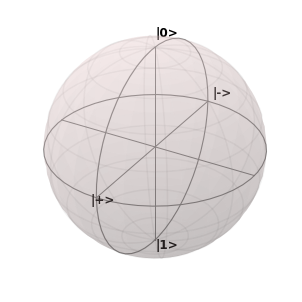

In [2]:
# Visual params
sphere_color = '#FFDDDD'           # Color of Bloch sphere, default = #FFDDDD'  
sphere_alpha = 0.2                 # Transparency of Bloch sphere, default = 0.2
frame_color = 'gray'               # Color of wireframe, default = 'gray'
frame_width = 1                    # Width of wireframe, default = 1
frame_alpha = 0.1                  # Transparency of wireframe, default = 0.2

# 3D plot
fig = plt.figure(figsize=(4,4))
ax = p3.Axes3D(fig)


ax.set_xlim3d([-0.7, 0.7])
#ax.set_xlabel('X')
ax.set_ylim3d([-0.7, 0.7])
#ax.set_ylabel('Y')
ax.set_zlim3d([-0.7, 0.7])
#ax.set_zlabel('Z')
#ax.set_title('Bloch Sphere')
ax.set_axis_off()

ax.text(0,0,1.1,"|0>", weight = 'bold', fontsize=12)
ax.text(0,0,-1.1,"|1>", weight = 'bold', fontsize=12)
ax.text(1.1,0,0,"|+>", weight = 'bold', fontsize=12)
ax.text(-1.1,0,0,"|->", weight = 'bold', fontsize=12)

# Sphere
u = np.linspace(0,2*np.pi, 51)
v = np.linspace(0, np.pi,51)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x_sphere,y_sphere,z_sphere, rstride=2, cstride=2, 
                color=sphere_color, linewidth=0, alpha=sphere_alpha)

# Wireframe                
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, rstride=5, cstride=5,
                  color=frame_color, alpha=frame_alpha)
           

# Equator
ax.plot(1.0 * np.cos(u), 1.0 * np.sin(u), zs=0, zdir='z',
          lw=frame_width, color=frame_color)
ax.plot(1.0 * np.cos(u), 1.0 * np.sin(u), zs=0, zdir='y',
          lw=frame_width, color=frame_color)   
      
# Axes
span = np.linspace(-1.0, 1.0, 2)
ax.plot(span, 0 * span, zs=0, zdir='z', label='X',
                lw=frame_width, color=frame_color)
ax.plot(0 * span, span, zs=0, zdir='z', label='Y',
                lw=frame_width, color=frame_color)
ax.plot(0 * span, span, zs=0, zdir='y', label='Z',
                lw=frame_width, color=frame_color)

ax.view_init(azim=30, elev=30)

# INITIALIZE VECTORS

In [3]:
# Pauli matrices (will be used to extract Bloch vector components)
X_mat = Pauli.pauli_single(1,0,'X').to_matrix()
Y_mat = Pauli.pauli_single(1,0,'Y').to_matrix()
Z_mat = Pauli.pauli_single(1,0,'Z').to_matrix()

# Visual params
vector_color = '#D4578D'
vector_width = 4
vector_head = 12

# Vector init
dot, = ax.plot([], [], [], lw=vector_width, c = vector_color, marker = 'o', markersize = vector_head,
               markerfacecolor=vector_color, markeredgecolor = vector_color)

# STATE TO COORDINATE FUNCTION

In [4]:
def state_to_space(rho_mat):
    
    x_vect = np.real(np.trace(np.dot(X_mat,rho_mat)))
    y_vect = np.real(np.trace(np.dot(Y_mat,rho_mat)))
    z_vect = np.real(np.trace(np.dot(Z_mat,rho_mat)))
    
    dot.set_data([x_vect], [y_vect])
    dot.set_3d_properties([z_vect])
    
    return dot,

# DEFINE CIRCUIT

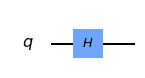

In [5]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.draw('mpl')

# PLOT

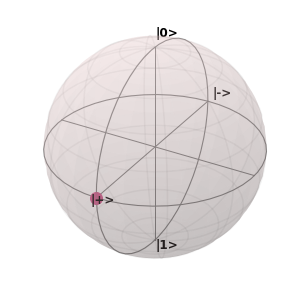

In [6]:
rho_mat = qi.DensityMatrix.from_instruction(qc1).data # Converts circuit to density matrix
state_to_space(rho_mat)
fig